In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np # linear algebra
import cv2

import os
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, 
    Dense, Dropout, 
    Flatten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(os.listdir("/content/gdrive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/data"))

['covid', 'non_covid']


In [0]:
IMG_SIZE = 128

In [0]:
CATEGORIES = ['covid', 'non_covid']
dataset = []

def generate_data():
    for category in CATEGORIES:
        path = f'/content/gdrive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/data/{category}'
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (IMG_SIZE , IMG_SIZE))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    random.shuffle(dataset)
                
generate_data()

In [0]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [0]:
print(len(dataset))

162


In [0]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [0]:
data = np.array(data)
data.reshape(-1, 128, 128, 3)

array([[[[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [250, 250, 250],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        ...,

        [[  1,   1,   1],
         [254, 254, 254],
         [ 40,  40,  40],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [ 31,  31,  31],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [ 21,  21,  21],
         ...,
         [  2,   2,   2],
        

In [0]:
pickle.dump(data, open("data1.pickle", "wb"))

pickle.dump(labels, open("labels1.pickle", "wb"))

In [0]:
data = pickle.load(open("data1.pickle", "rb"))

labels = pickle.load(open("labels1.pickle", "rb"))

In [0]:
train_data, data, train_labels, labels = train_test_split(data, 
                                                          labels,
                                                          test_size=0.2)

test_data, validation_data, test_labels, validation_labels = train_test_split(data, 
                                                                    labels,
                                                                    test_size=0.7)

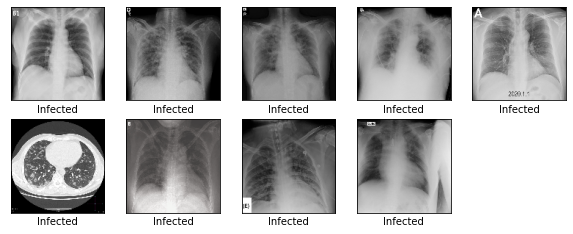

In [0]:
plt.figure(figsize=(10, 10))
i = 0
for i in range(len(test_data)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i])
    if(test_labels[i] == 0):
        plt.xlabel('Infected')
    else:
        plt.xlabel('Uninfected')
    i += 1
plt.show()

In [0]:
datagen_train = ImageDataGenerator(rescale=1./255,
                            rotation_range=45,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

datagen_test = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

NameError: ignored

In [0]:
datagen_train.fit(train_data)
datagen_test.fit(test_data)
datagen_test.fit(validation_data)

In [0]:
model = Sequential([
      
       Flatten(),
       Dense(32, activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)) ,
       Dense(16,activation='relu'),
       Dropout(0.2),
       Dense(32, activation='relu'),
       Dense(32, activation='sigmoid'),
       Dropout(0.5),
       Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [0]:
BATCH_SIZE = 32
epochs = 30
history = model.fit_generator(datagen_train.flow(train_data, train_labels, batch_size=BATCH_SIZE),
                   steps_per_epoch=8000 / BATCH_SIZE,
                   epochs=epochs,
                   validation_data=datagen_validation.flow(validation_data, 
                                                     validation_labels, batch_size=BATCH_SIZE),
                    
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
249/250 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7823

In [0]:
accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.8394160866737366
Training Loss: 0.4403631904612492
Validation Accuracy: 0.8421052694320679
Validation Loss: 0.4361623525619507


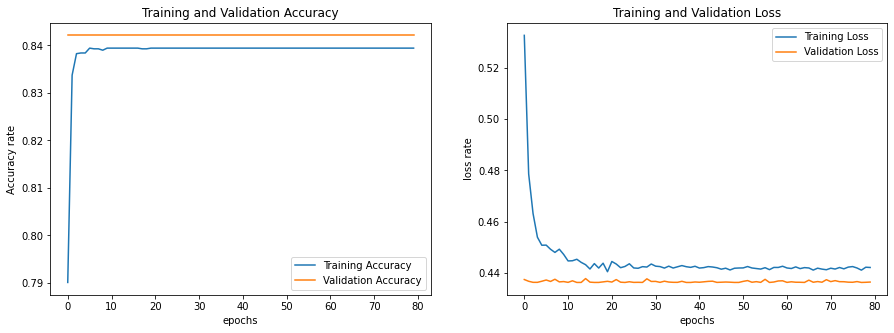

In [0]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('Accuracy rate')
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss rate')
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [0]:
class_names = ['cancer', 'normal']
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]))

In [0]:
random.shuffle(test_data)
predictions = model.predict(test_data)


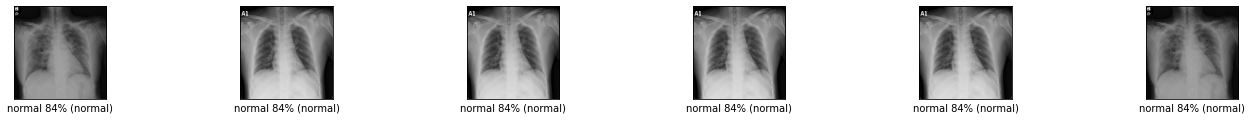

In [0]:
num_rows = 8
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(test_data)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions, test_labels, test_data)

In [0]:
model.summary( )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1572896   
_________________________________________________________________
dense_1 (Dense)              multiple                  528       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  544       
_________________________________________________________________
dense_3 (Dense)              multiple                  1056      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0

In [0]:
loss , accuracy = model.evaluate( test_data , test_labels )
print( "Loss of {}".format( loss ) , "Accuracy of {} %".format( accuracy * 100 ) )

6/6 [==============================] - 0s 998us/sample - loss: 0.1794 - acc: 1.0000
Loss of 0.17944364249706268 Accuracy of 100.0 %


In [0]:
pred=model.predict( test_data).argmax( axis=1 ) 
print ( pred )

[1 1 1 1 1 1]


In [0]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
print('F1_score : ',f1_score(test_labels,pred))
print('sensitibity : ',metrics.recall_score(test_labels, pred))

F1_score :  1.0
sensitibity :  1.0


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


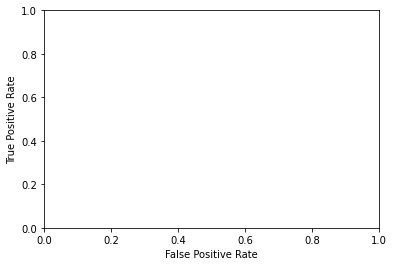

ValueError: ignored

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,pred)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,pred) 
print(auc_score) 
print(matthews_corrcoef(test_labels,pred))

In [0]:

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 
   

In [0]:
confusion = confusion_matrix(test_set.classes, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [0]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('sensitivity =',TP/(TP+FN))
print(metrics.recall_score(test_set.classes, y_pred))
recall=metrics.recall_score(test_set.classes, y_pred)
print('specificity =',TN/(TN+FP))
print('F1_score = ',f1_score(test_set.classes,y_pred))
#print('F1_score = ',2*((metrics.precision_score(test_set.classes, y_pred)*recall)/(metrics.precision_score(test_set.classes, y_pred)+recall)))

In [0]:
history.history

In [0]:
classifier.metrics_names

In [0]:
import matplotlib.pyplot as plt



loss = history.history['loss']
val_loss = history.history['val_loss']


acc = history.history['acc']
val_acc = history.history['val_acc']



epochs = range(len(loss))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()